In [ ]:
#Import Python Packages
#from google.colab import drive
#drive.mount('/content/drive/')

from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:
#Import all necessary librabry

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree

In [ ]:
#Read training data file
trainfile = r'/gdrive/My Drive/Colab Notebooks/Santander Customer Satisfaction - TRAIN.csv'
trainData = pd.read_csv(trainfile)

#Read test data file
testfile = r'/gdrive/My Drive/Colab Notebooks/Santander Customer Satisfaction - TEST-Without TARGET.csv'
testData = pd.read_csv(testfile)

trainData.head()
#print("=======")
testData.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [ ]:
#Defining trainData and testData for the first version of our model building:

trainData1 = trainData
testData1 = testData

In [ ]:
print(trainData1.shape)      # To get (Number of Rows, Number of Columns) of a data frame we use DataFrame.shape
print(testData1.shape)

(76020, 371)
(75818, 370)


In [ ]:
#Understanding the Columns
trainData1.info()
print()
testData1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75818 entries, 0 to 75817
Columns: 370 entries, ID to var38
dtypes: float64(110), int64(260)
memory usage: 214.0 MB


In [ ]:
# Set the display option to show all columns
#pd.set_option('display.max_rows', None)
# To check number of null values
trainData1.isna().sum()
#We DON'T have any NULL values in the dataset(Truncating output display)

ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 371, dtype: int64

In [ ]:
# To check basic statistics of a data set, column wise
trainData1.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


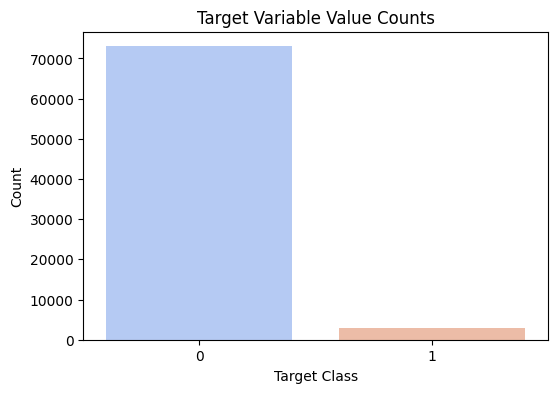

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

value_counts = trainData1['TARGET'].value_counts()

# Create a bar plot using Seaborn
plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
sns.barplot(x=value_counts.index, y=value_counts, palette='coolwarm')
plt.title('Target Variable Value Counts')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

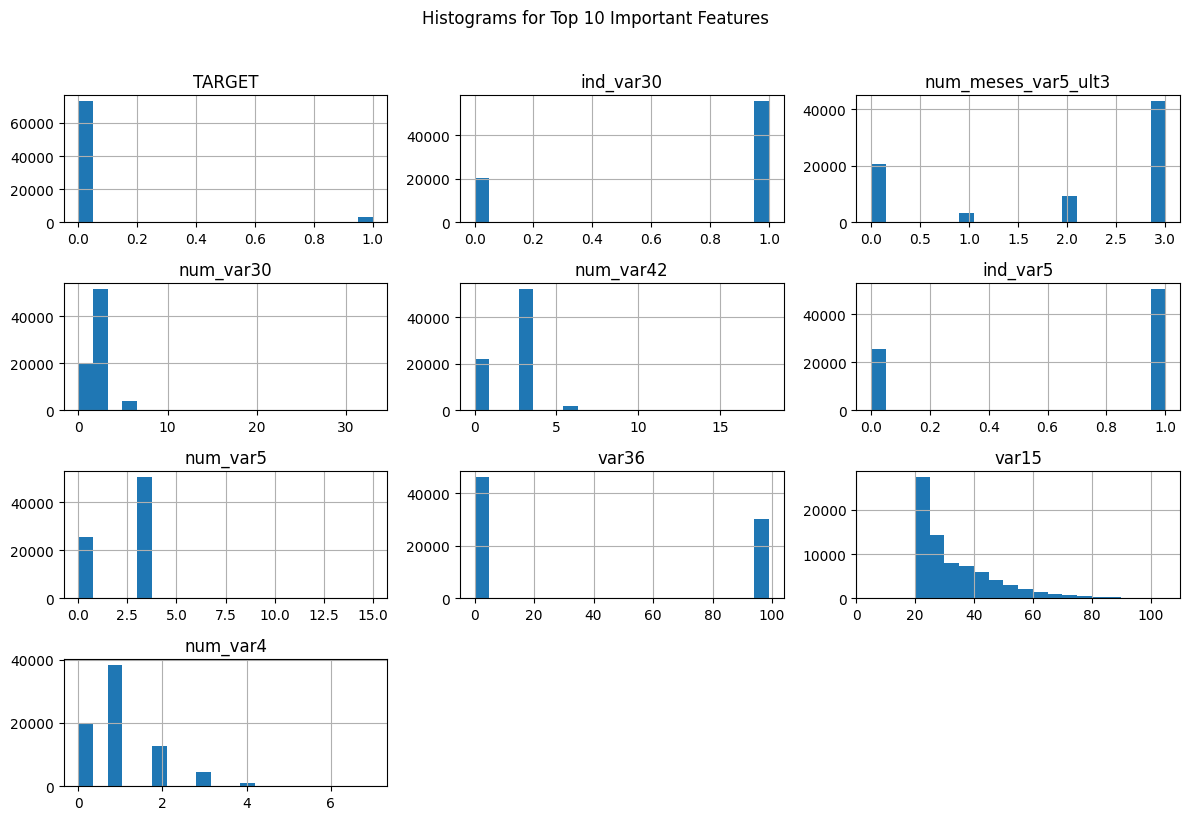

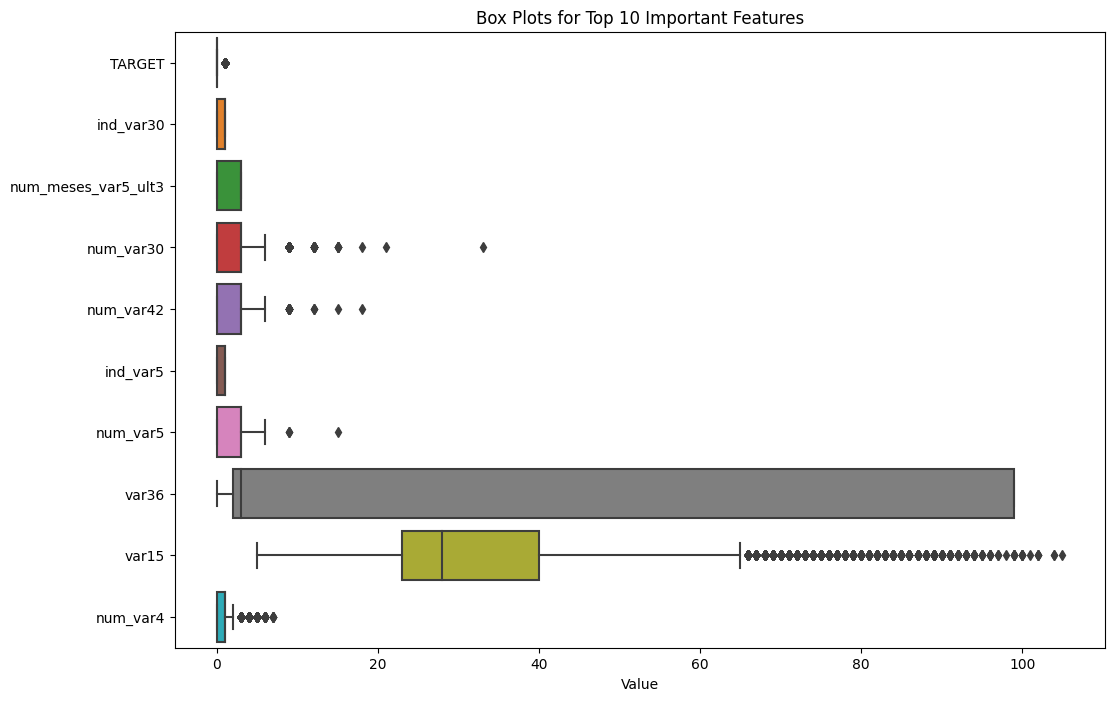

In [ ]:
# Calculate the absolute correlation between each feature and the target variable
correlations = trainData1.corr()['TARGET'].abs()

# Sort the correlations in descending order and get the top 10 features
top_10_features = correlations.sort_values(ascending=False).head(10)

# Create a DataFrame with the top 10 features
data_subset = trainData1[top_10_features.index]

# Plot histograms for the top 10 features
data_subset.hist(bins=20, figsize=(12, 8))
plt.suptitle('Histograms for Top 10 Important Features', y=1.02)
plt.tight_layout()
plt.show()

# Plot box plots for the top 10 features
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_subset, orient='h')
plt.title('Box Plots for Top 10 Important Features')
plt.xlabel('Value')
plt.show()


In [ ]:
#To get list of names of all Columns from a dataframe

TrainCols = list(trainData1.columns.values)
TestCols = list(testData1.columns.values)
print(TrainCols)
print(TestCols)

['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1', 'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1', 'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1', 'imp_op_var40_efect_ult3', 'imp_op_var40_ult1', 'imp_op_var41_comer_ult1', 'imp_op_var41_comer_ult3', 'imp_op_var41_efect_ult1', 'imp_op_var41_efect_ult3', 'imp_op_var41_ult1', 'imp_op_var39_efect_ult1', 'imp_op_var39_efect_ult3', 'imp_op_var39_ult1', 'imp_sal_var16_ult1', 'ind_var1_0', 'ind_var1', 'ind_var2_0', 'ind_var2', 'ind_var5_0', 'ind_var5', 'ind_var6_0', 'ind_var6', 'ind_var8_0', 'ind_var8', 'ind_var12_0', 'ind_var12', 'ind_var13_0', 'ind_var13_corto_0', 'ind_var13_corto', 'ind_var13_largo_0', 'ind_var13_largo', 'ind_var13_medio_0', 'ind_var13_medio', 'ind_var13', 'ind_var14_0', 'ind_var14', 'ind_var17_0', 'ind_var17', 'ind_var18_0', 'ind_var18', 'ind_var19', 'ind_var20_0', 'ind_var20', 'ind_var24_0', 'ind_var24', 'ind_var25_cte', 'ind_var26_0', 'ind_var26_cte', 'ind_var26', 'ind_var25_0', 'ind_var2

In [ ]:
# Seperate Target column from Train Data
Xtrain = trainData1[TrainCols[0:len(TrainCols)-1]].copy()
Ytrain = trainData1[['TARGET']].copy()
print(Xtrain.shape)
print(Ytrain.shape)
#Xtest = testData.drop(['TARGET'], axis=1)
Xtest = testData1
print(Xtest.shape)

(76020, 370)
(76020, 1)
(75818, 370)


In [ ]:
# Initialising Decision Tree Algorithm and fitting the model on train set
#dt = DecisionTreeClassifier()
#dt=DecisionTreeClassifier(criterion="entropy",max_depth=10,splitter=best)
# Create a Decision Tree classifier
dt = DecisionTreeClassifier(criterion="gini", max_depth=10, splitter="best", min_samples_split=2,)
dt.fit(Xtrain, Ytrain)
Y_Pred = dt.predict(Xtest)
print (Y_Pred)
Y_Pred = pd.DataFrame(Y_Pred,columns=['TARGET'])
print (Y_Pred)
#Y_Pred.to_csv(index=False)
# Use this Y_Pred on Kaggle website to get accuracy result.

[0 0 0 ... 0 0 0]
       TARGET
0           0
1           0
2           0
3           0
4           0
...       ...
75813       0
75814       0
75815       0
75816       0
75817       0

[75818 rows x 1 columns]


In [ ]:
# Initialising Decision Tree Algorithm and fitting the model on train set
dt = DecisionTreeClassifier()
#dt = DecisionTreeClassifier(criterion = "entropy")
#dt = DecisionTreeClassifier(criterion = "entropy", max_depth = 20)
#dt = DecisionTreeClassifier(criterion = "entropy", max_depth = 15, max_leaf_nodes = 100)
#dt = DecisionTreeClassifier(criterion = "entropy", max_depth = 30, max_leaf_nodes = 100, max_features = 9)

dt.fit(Xtrain, Ytrain)
Y_Pred = dt.predict(Xtest)
#print (Y_Pred)
Y_Pred = pd.DataFrame(Y_Pred,columns=['TARGET'])
#print (Y_Pred)
#Y_Pred.to_csv(index=False)
# Use this Y_Pred on Kaggle website to get accuracy result.

In [ ]:
# Basic Analysis
print("Count of values in TARGET column for Train Data")
print(Ytrain['TARGET'].value_counts())


Count of values in TARGET column for Train Data
0    73012
1     3008
Name: TARGET, dtype: int64


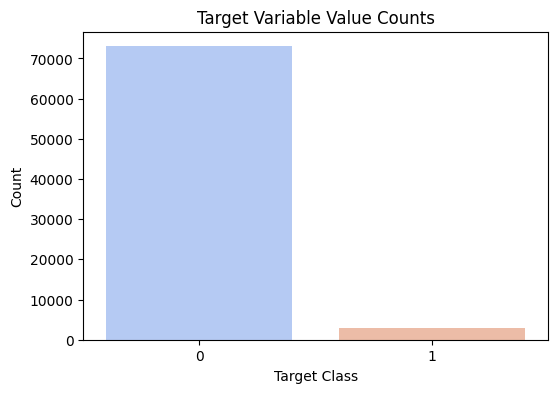

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

value_counts = Ytrain['TARGET'].value_counts()

# Create a bar plot using Seaborn
plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
sns.barplot(x=value_counts.index, y=value_counts, palette='coolwarm')
plt.title('Target Variable Value Counts')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

**The dataset is highly imbalanced. We have very little data on class '1'.**

In [ ]:
# For us to check accuracy of our algorithm, we need to predict that data set for which we have TARGET available.
# Eg predict for Xtrain and check accuracy with TARGET that we have in order to judge our model.

Train_Pred = dt.predict(Xtrain)
#Model Accuracy
print(" TRAIN Accuracy:", metrics.accuracy_score(Ytrain,Train_Pred))

# This will always result in best score hence we are better off using TrainTestSplit, which can help us take care of

 TRAIN Accuracy: 1.0


In [ ]:
# Split dataset
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size = .50, random_state = 1)
# Fit model on new Train Dataset
dt = dt.fit(X_train, Y_train)
#Predict the responce on new Test Dataset
Y_PredNew = dt.predict(X_test)
#Model Accuracy
print("TEST Accuracy:", metrics.accuracy_score(Y_test,Y_PredNew))

TEST Accuracy: 0.9244672454617207


In [ ]:
# Actual VS Predicted Matrix and TP,FP,TN,FN evaluation
print(metrics.confusion_matrix(Y_test, Y_PredNew))
print()
print('Printing the precision and recall, among other metrics')
print(metrics.classification_report(Y_test, Y_PredNew))

[[34925  1605]
 [ 1266   214]]

Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     36530
           1       0.12      0.14      0.13      1480

    accuracy                           0.92     38010
   macro avg       0.54      0.55      0.55     38010
weighted avg       0.93      0.92      0.93     38010



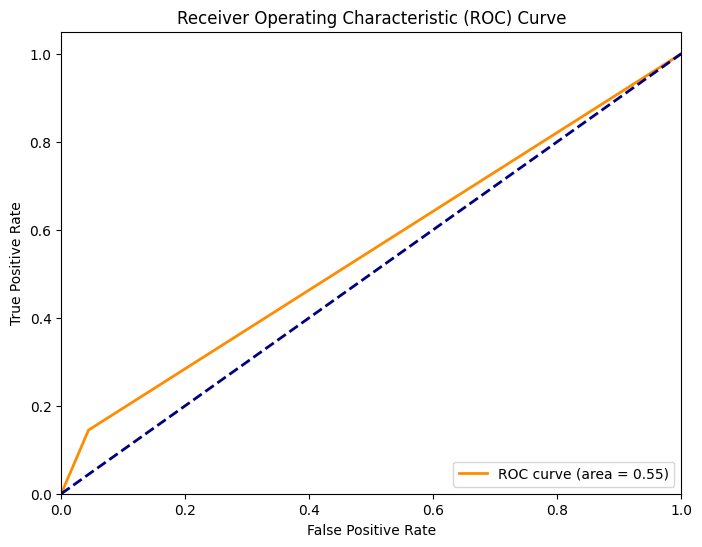

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate the AUC
roc_auc = roc_auc_score(Y_test, Y_PredNew)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_PredNew)

# Create a ROC curve plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#Plotting the decision Tree
#tree.plot_tree(dt)

In [ ]:
#Get Class Prediction probabilities as a data frame
#Get Prediction Probability for the predicted class as a dataframe
pred_Probability =pd.DataFrame(dt.predict_proba(X_train))
pred_Probability.head()

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0


In [ ]:
import pandas as pd

# Concatenate the "ID" column from the original training data with the predicted "TARGET" values
result = pd.concat([Xtest['ID'], pd.DataFrame(Y_Pred, columns=['TARGET'])], axis=1)

# Save the result to a CSV file
result.to_csv('/gdrive/My Drive/Colab Notebooks/res1.csv', index=False)

# Read and display the CSV file
res = pd.read_csv('/gdrive/My Drive/Colab Notebooks/res1.csv')
res.tail()

,ID,TARGET
75813,151831,0
75814,151832,1
75815,151833,1
75816,151834,0
75817,151837,0


# **VERSION 2:**

In [ ]:
#Defining trainData and testData for the second version of our model building:

trainData2 = trainData
testData2 = testData

In [ ]:
#To get list of names of all Columns from a dataframe

TrainCols = list(trainData1.columns.values)
TestCols = list(testData1.columns.values)
print(TrainCols)
print(TestCols)

['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1', 'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1', 'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1', 'imp_op_var40_efect_ult3', 'imp_op_var40_ult1', 'imp_op_var41_comer_ult1', 'imp_op_var41_comer_ult3', 'imp_op_var41_efect_ult1', 'imp_op_var41_efect_ult3', 'imp_op_var41_ult1', 'imp_op_var39_efect_ult1', 'imp_op_var39_efect_ult3', 'imp_op_var39_ult1', 'imp_sal_var16_ult1', 'ind_var1_0', 'ind_var1', 'ind_var2_0', 'ind_var2', 'ind_var5_0', 'ind_var5', 'ind_var6_0', 'ind_var6', 'ind_var8_0', 'ind_var8', 'ind_var12_0', 'ind_var12', 'ind_var13_0', 'ind_var13_corto_0', 'ind_var13_corto', 'ind_var13_largo_0', 'ind_var13_largo', 'ind_var13_medio_0', 'ind_var13_medio', 'ind_var13', 'ind_var14_0', 'ind_var14', 'ind_var17_0', 'ind_var17', 'ind_var18_0', 'ind_var18', 'ind_var19', 'ind_var20_0', 'ind_var20', 'ind_var24_0', 'ind_var24', 'ind_var25_cte', 'ind_var26_0', 'ind_var26_cte', 'ind_var26', 'ind_var25_0', 'ind_var2

In [ ]:
# Seperate Target column from Train Data
Xtrain = trainData2[TrainCols[0:len(TrainCols)-1]].copy()
Ytrain = trainData2[['TARGET']].copy()
print(Xtrain.shape)
print(Ytrain.shape)
#Xtest = testData.drop(['TARGET'], axis=1)
Xtest = testData2
print(Xtest.shape)

(76020, 370)
(76020, 1)
(75818, 370)


In [ ]:
# Initialising Decision Tree Algorithm and fitting the model on train set
#dt = DecisionTreeClassifier()
#dt = DecisionTreeClassifier(criterion = "entropy")
dt = DecisionTreeClassifier(criterion = "entropy", max_depth = 20, splitter="best", min_samples_split=2)
#dt = DecisionTreeClassifier(criterion = "entropy", max_depth = 15, max_leaf_nodes = 100)
#dt = DecisionTreeClassifier(criterion = "entropy", max_depth = 30, max_leaf_nodes = 100, max_features = 9)

dt.fit(Xtrain, Ytrain)
Y_Pred = dt.predict(Xtest)
#print (Y_Pred)
Y_Pred = pd.DataFrame(Y_Pred,columns=['TARGET'])
#print (Y_Pred)
#Y_Pred.to_csv(index=False)
# Use this Y_Pred on Kaggle website to get accuracy result.

In [ ]:
# Basic Analysis
print("Count of values in TARGET column for Train Data")
print(Ytrain['TARGET'].value_counts())


Count of values in TARGET column for Train Data
0    73012
1     3008
Name: TARGET, dtype: int64


In [ ]:
# For us to check accuracy of our algorithm, we need to predict that data set for which we have TARGET available.
# Eg predict for Xtrain and check accuracy with TARGET that we have in order to judge our model.

Train_Pred = dt.predict(Xtrain)
#Model Accuracy
print(" TRAIN Accuracy:", metrics.accuracy_score(Ytrain,Train_Pred))

# This will always result in best score hence we are better off using TrainTestSplit, which can help us take care of

 TRAIN Accuracy: 0.9790186792949224


In [ ]:
# Split dataset
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size = .50, random_state = 1)
# Fit model on new Train Dataset
dt = dt.fit(X_train, Y_train)
#Predict the responce on new Test Dataset
Y_PredNew = dt.predict(X_test)
#Model Accuracy
print("TEST Accuracy:", metrics.accuracy_score(Y_test,Y_PredNew))

TEST Accuracy: 0.9439094975006577


In [ ]:
# Actual VS Predicted Matrix and TP,FP,TN,FN evaluation
print(metrics.confusion_matrix(Y_test, Y_PredNew))
print()
print('Printing the precision and recall, among other metrics')
print(metrics.classification_report(Y_test, Y_PredNew))

[[35801   729]
 [ 1403    77]]

Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     36530
           1       0.10      0.05      0.07      1480

    accuracy                           0.94     38010
   macro avg       0.53      0.52      0.52     38010
weighted avg       0.93      0.94      0.94     38010



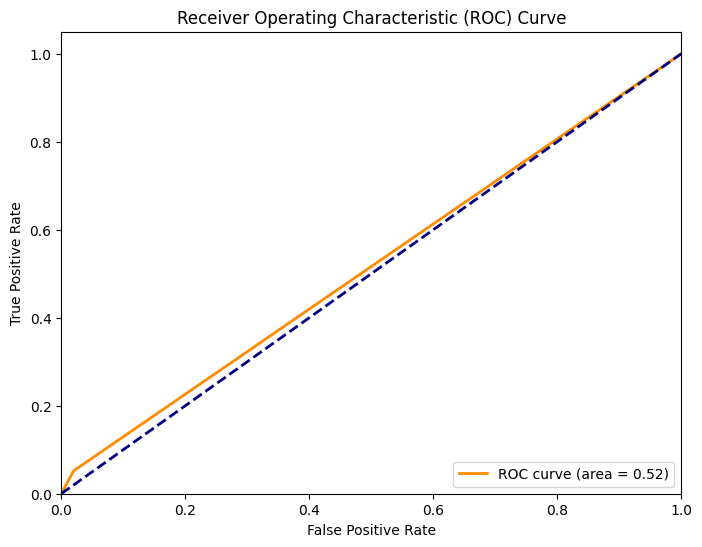

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate the AUC
roc_auc = roc_auc_score(Y_test, Y_PredNew)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_PredNew)

# Create a ROC curve plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import pandas as pd

# Concatenate the "ID" column from the original training data with the predicted "TARGET" values
result = pd.concat([Xtest['ID'], pd.DataFrame(Y_Pred, columns=['TARGET'])], axis=1)

# Save the result to a CSV file
result.to_csv('/gdrive/My Drive/Colab Notebooks/res2.csv', index=False)

# Read and display the CSV file
res = pd.read_csv('/gdrive/My Drive/Colab Notebooks/res2.csv')
res.tail()

,ID,TARGET
75813,151831,0
75814,151832,0
75815,151833,0
75816,151834,0
75817,151837,0


# **VERSION 3:**

**In this version, let's try to balance the data a bit and then try to run the decision tree model.**

In [ ]:
#Defining trainData and testData for the second version of our model building:

trainData3 = trainData
testData3 = testData

In [ ]:
#To get list of names of all Columns from a dataframe

TrainCols = list(trainData1.columns.values)
TestCols = list(testData1.columns.values)
print(TrainCols)
print(TestCols)

['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1', 'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1', 'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1', 'imp_op_var40_efect_ult3', 'imp_op_var40_ult1', 'imp_op_var41_comer_ult1', 'imp_op_var41_comer_ult3', 'imp_op_var41_efect_ult1', 'imp_op_var41_efect_ult3', 'imp_op_var41_ult1', 'imp_op_var39_efect_ult1', 'imp_op_var39_efect_ult3', 'imp_op_var39_ult1', 'imp_sal_var16_ult1', 'ind_var1_0', 'ind_var1', 'ind_var2_0', 'ind_var2', 'ind_var5_0', 'ind_var5', 'ind_var6_0', 'ind_var6', 'ind_var8_0', 'ind_var8', 'ind_var12_0', 'ind_var12', 'ind_var13_0', 'ind_var13_corto_0', 'ind_var13_corto', 'ind_var13_largo_0', 'ind_var13_largo', 'ind_var13_medio_0', 'ind_var13_medio', 'ind_var13', 'ind_var14_0', 'ind_var14', 'ind_var17_0', 'ind_var17', 'ind_var18_0', 'ind_var18', 'ind_var19', 'ind_var20_0', 'ind_var20', 'ind_var24_0', 'ind_var24', 'ind_var25_cte', 'ind_var26_0', 'ind_var26_cte', 'ind_var26', 'ind_var25_0', 'ind_var2

In [ ]:
# Seperate Target column from Train Data
Xtrain = trainData3[TrainCols[0:len(TrainCols)-1]].copy()
Ytrain = trainData3[['TARGET']].copy()
print(Xtrain.shape)
print(Ytrain.shape)
#Xtest = testData.drop(['TARGET'], axis=1)
Xtest = testData3
print(Xtest.shape)

(76020, 370)
(76020, 1)
(75818, 370)


In [ ]:
from imblearn.over_sampling import SMOTE

# For the features features Xtrain and label Ytrain
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(Xtrain, Ytrain)

In [ ]:
X_resampled.shape

(146024, 370)

In [ ]:
y_resampled.shape

(146024, 1)

In [ ]:
# Initialising Decision Tree Algorithm and fitting the model on train set
#dt = DecisionTreeClassifier()
#dt = DecisionTreeClassifier(criterion = "entropy")
dt = DecisionTreeClassifier(criterion = "entropy", max_depth = 20, splitter="best", min_samples_split=2)
#dt = DecisionTreeClassifier(criterion = "entropy", max_depth = 15, max_leaf_nodes = 100)
#dt = DecisionTreeClassifier(criterion = "entropy", max_depth = 30, max_leaf_nodes = 100, max_features = 9)

dt.fit(X_resampled, y_resampled)
Y_Pred = dt.predict(Xtest)
#print (Y_Pred)
Y_Pred = pd.DataFrame(Y_Pred,columns=['TARGET'])
#print (Y_Pred)
#Y_Pred.to_csv(index=False)
# Use this Y_Pred on Kaggle website to get accuracy result.

In [ ]:
# Basic Analysis
print("Count of values in TARGET column for Train Data")
print(y_resampled['TARGET'].value_counts())


Count of values in TARGET column for Train Data
0    73012
1    73012
Name: TARGET, dtype: int64


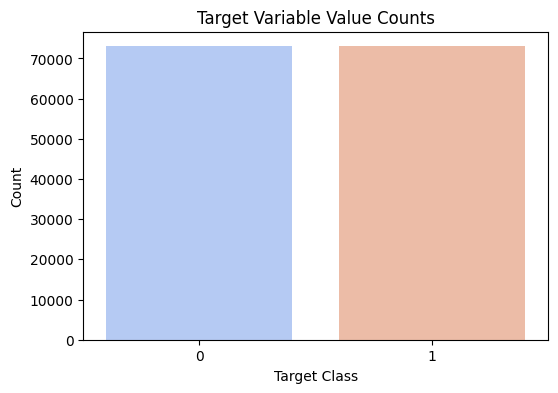

In [ ]:
value_counts = y_resampled['TARGET'].value_counts()

# Create a bar plot using Seaborn
plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
sns.barplot(x=value_counts.index, y=value_counts, palette='coolwarm')
plt.title('Target Variable Value Counts')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

In [ ]:
# For us to check accuracy of our algorithm, we need to predict that data set for which we have TARGET available.
# Eg predict for Xtrain and check accuracy with TARGET that we have in order to judge our model.

Train_Pred = dt.predict(X_resampled)
#Model Accuracy
print(" TRAIN Accuracy:", metrics.accuracy_score(y_resampled,Train_Pred))

# This will always result in best score hence we are better off using TrainTestSplit, which can help us take care of

 TRAIN Accuracy: 0.9615748096203364


In [ ]:
# Split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, y_resampled, test_size = .50, random_state = 1)
# Fit model on new Train Dataset
dt = dt.fit(X_train, Y_train)
#Predict the responce on new Test Dataset
Y_PredNew = dt.predict(X_test)
#Model Accuracy
print("TEST Accuracy:", metrics.accuracy_score(Y_test,Y_PredNew))

TEST Accuracy: 0.925738234810716


In [ ]:
# Actual VS Predicted Matrix and TP,FP,TN,FN evaluation
print(metrics.confusion_matrix(Y_test, Y_PredNew))
print()
print('Printing the precision and recall, among other metrics')
print(metrics.classification_report(Y_test, Y_PredNew))

[[32963  3628]
 [ 1794 34627]]

Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

           0       0.95      0.90      0.92     36591
           1       0.91      0.95      0.93     36421

    accuracy                           0.93     73012
   macro avg       0.93      0.93      0.93     73012
weighted avg       0.93      0.93      0.93     73012



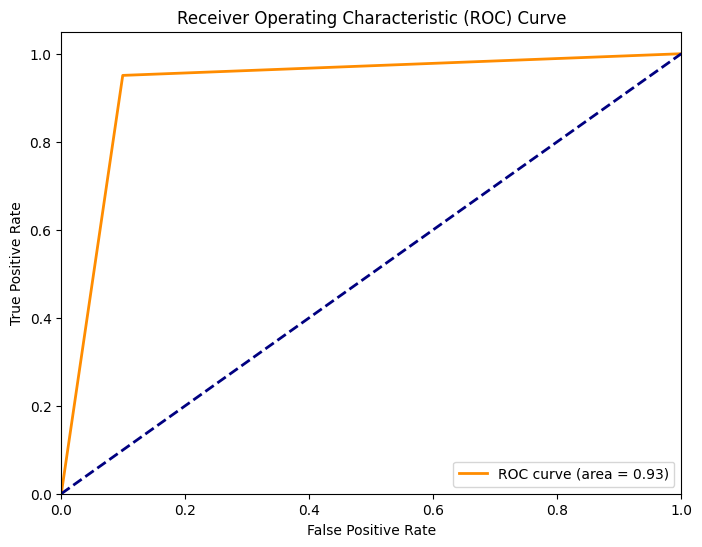

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate the AUC
roc_auc = roc_auc_score(Y_test, Y_PredNew)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_PredNew)

# Create a ROC curve plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import pandas as pd

# Concatenate the "ID" column from the original training data with the predicted "TARGET" values
result = pd.concat([Xtest['ID'], pd.DataFrame(Y_Pred, columns=['TARGET'])], axis=1)

# Save the result to a CSV file
result.to_csv('/gdrive/My Drive/Colab Notebooks/res3.csv', index=False)

# Read and display the CSV file
res = pd.read_csv('/gdrive/My Drive/Colab Notebooks/res3.csv')
res.tail()

,ID,TARGET
75813,151831,0
75814,151832,0
75815,151833,0
75816,151834,0
75817,151837,0


# **VERSION 4:**

**In this version, let's try to improve above model by hyper parameter tuning!**

In [ ]:
#Defining trainData and testData for the second version of our model building:

trainData4 = trainData
testData4 = testData

In [ ]:
#To get list of names of all Columns from a dataframe

TrainCols = list(trainData1.columns.values)
TestCols = list(testData1.columns.values)
print(TrainCols)
print(TestCols)

['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1', 'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1', 'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1', 'imp_op_var40_efect_ult3', 'imp_op_var40_ult1', 'imp_op_var41_comer_ult1', 'imp_op_var41_comer_ult3', 'imp_op_var41_efect_ult1', 'imp_op_var41_efect_ult3', 'imp_op_var41_ult1', 'imp_op_var39_efect_ult1', 'imp_op_var39_efect_ult3', 'imp_op_var39_ult1', 'imp_sal_var16_ult1', 'ind_var1_0', 'ind_var1', 'ind_var2_0', 'ind_var2', 'ind_var5_0', 'ind_var5', 'ind_var6_0', 'ind_var6', 'ind_var8_0', 'ind_var8', 'ind_var12_0', 'ind_var12', 'ind_var13_0', 'ind_var13_corto_0', 'ind_var13_corto', 'ind_var13_largo_0', 'ind_var13_largo', 'ind_var13_medio_0', 'ind_var13_medio', 'ind_var13', 'ind_var14_0', 'ind_var14', 'ind_var17_0', 'ind_var17', 'ind_var18_0', 'ind_var18', 'ind_var19', 'ind_var20_0', 'ind_var20', 'ind_var24_0', 'ind_var24', 'ind_var25_cte', 'ind_var26_0', 'ind_var26_cte', 'ind_var26', 'ind_var25_0', 'ind_var2

In [ ]:
# Seperate Target column from Train Data
Xtrain = trainData4[TrainCols[0:len(TrainCols)-1]].copy()
Ytrain = trainData4[['TARGET']].copy()
print(Xtrain.shape)
print(Ytrain.shape)
#Xtest = testData.drop(['TARGET'], axis=1)
Xtest = testData4
print(Xtest.shape)

(76020, 370)
(76020, 1)
(75818, 370)


In [ ]:
from imblearn.over_sampling import SMOTE

# For the features features Xtrain and label Ytrain
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(Xtrain, Ytrain)

In [ ]:
print(X_resampled.shape)
print(y_resampled.shape)

(146024, 370)
(146024, 1)


In [ ]:
# Initialising Decision Tree Algorithm and fitting the model on train set
#dt = DecisionTreeClassifier()
#dt = DecisionTreeClassifier(criterion = "entropy")
#dt = DecisionTreeClassifier(criterion = "entropy", max_depth = 20)
dt = DecisionTreeClassifier(criterion = "entropy", max_depth = 15, max_leaf_nodes = 100, splitter="best", min_samples_split=2)
#dt = DecisionTreeClassifier(criterion = "entropy", max_depth = 30, max_leaf_nodes = 100, max_features = 9)

dt.fit(X_resampled, y_resampled)
Y_Pred = dt.predict(Xtest)
#print (Y_Pred)
Y_Pred = pd.DataFrame(Y_Pred,columns=['TARGET'])
#print (Y_Pred)
#Y_Pred.to_csv(index=False)
# Use this Y_Pred on Kaggle website to get accuracy result.

In [ ]:
# Basic Analysis
print("Count of values in TARGET column for Train Data")
print(y_resampled['TARGET'].value_counts())


Count of values in TARGET column for Train Data
0    73012
1    73012
Name: TARGET, dtype: int64


In [ ]:
# For us to check accuracy of our algorithm, we need to predict that data set for which we have TARGET available.
# Eg predict for Xtrain and check accuracy with TARGET that we have in order to judge our model.

Train_Pred = dt.predict(X_resampled)
#Model Accuracy
print(" TRAIN Accuracy:", metrics.accuracy_score(y_resampled,Train_Pred))

# This will always result in best score hence we are better off using TrainTestSplit, which can help us take care of

 TRAIN Accuracy: 0.9048581055169014


In [ ]:
# Split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, y_resampled, test_size = .50, random_state = 1)
# Fit model on new Train Dataset
dt = dt.fit(X_train, Y_train)
#Predict the responce on new Test Dataset
Y_PredNew = dt.predict(X_test)
#Model Accuracy
print("TEST Accuracy:", metrics.accuracy_score(Y_test,Y_PredNew))

TEST Accuracy: 0.9006601654522545


In [ ]:
# Actual VS Predicted Matrix and TP,FP,TN,FN evaluation
print(metrics.confusion_matrix(Y_test, Y_PredNew))
print()
print('Printing the precision and recall, among other metrics')
print(metrics.classification_report(Y_test, Y_PredNew))

[[32672  3919]
 [ 3334 33087]]

Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

           0       0.91      0.89      0.90     36591
           1       0.89      0.91      0.90     36421

    accuracy                           0.90     73012
   macro avg       0.90      0.90      0.90     73012
weighted avg       0.90      0.90      0.90     73012



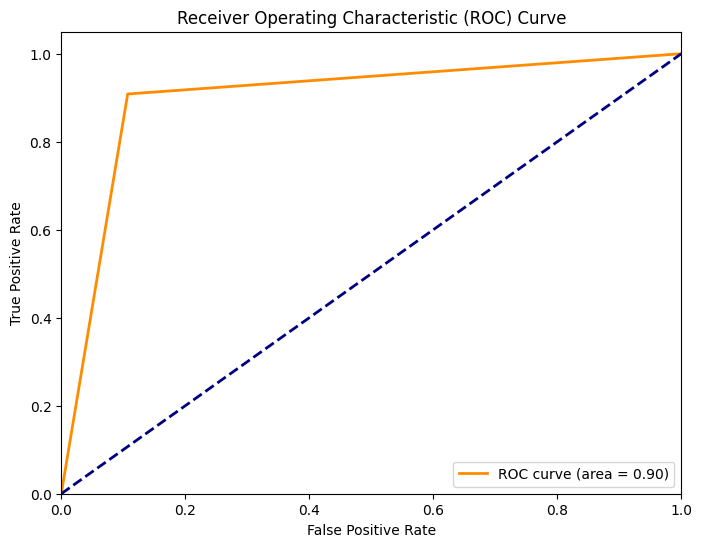

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate the AUC
roc_auc = roc_auc_score(Y_test, Y_PredNew)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_PredNew)

# Create a ROC curve plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import pandas as pd

# Concatenate the "ID" column from the original training data with the predicted "TARGET" values
result = pd.concat([Xtest['ID'], pd.DataFrame(Y_Pred, columns=['TARGET'])], axis=1)

# Save the result to a CSV file
result.to_csv('/gdrive/My Drive/Colab Notebooks/res4.csv', index=False)

# Read and display the CSV file
res = pd.read_csv('/gdrive/My Drive/Colab Notebooks/res4.csv')
res.tail()

,ID,TARGET
75813,151831,0
75814,151832,0
75815,151833,0
75816,151834,0
75817,151837,0


# **VERSION 5:**

**In this version, let's try to remove outliers after sampling!**

In [ ]:
#Defining trainData and testData for the second version of our model building:

trainData5 = trainData
testData5 = testData

In [ ]:
#To get list of names of all Columns from a dataframe

TrainCols = list(trainData1.columns.values)
TestCols = list(testData1.columns.values)
print(TrainCols)
print(TestCols)

['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1', 'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1', 'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1', 'imp_op_var40_efect_ult3', 'imp_op_var40_ult1', 'imp_op_var41_comer_ult1', 'imp_op_var41_comer_ult3', 'imp_op_var41_efect_ult1', 'imp_op_var41_efect_ult3', 'imp_op_var41_ult1', 'imp_op_var39_efect_ult1', 'imp_op_var39_efect_ult3', 'imp_op_var39_ult1', 'imp_sal_var16_ult1', 'ind_var1_0', 'ind_var1', 'ind_var2_0', 'ind_var2', 'ind_var5_0', 'ind_var5', 'ind_var6_0', 'ind_var6', 'ind_var8_0', 'ind_var8', 'ind_var12_0', 'ind_var12', 'ind_var13_0', 'ind_var13_corto_0', 'ind_var13_corto', 'ind_var13_largo_0', 'ind_var13_largo', 'ind_var13_medio_0', 'ind_var13_medio', 'ind_var13', 'ind_var14_0', 'ind_var14', 'ind_var17_0', 'ind_var17', 'ind_var18_0', 'ind_var18', 'ind_var19', 'ind_var20_0', 'ind_var20', 'ind_var24_0', 'ind_var24', 'ind_var25_cte', 'ind_var26_0', 'ind_var26_cte', 'ind_var26', 'ind_var25_0', 'ind_var2

In [ ]:
# Seperate Target column from Train Data
Xtrain = trainData5[TrainCols[0:len(TrainCols)-1]].copy()
Ytrain = trainData5[['TARGET']].copy()
print(Xtrain.shape)
print(Ytrain.shape)
#Xtest = testData.drop(['TARGET'], axis=1)
Xtest = testData5
print(Xtest.shape)

(76020, 370)
(76020, 1)
(75818, 370)


In [ ]:
from imblearn.over_sampling import SMOTE

# For the features features Xtrain and label Ytrain
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(Xtrain, Ytrain)

In [ ]:
print(X_resampled.shape)
print(y_resampled.shape)

(146024, 370)
(146024, 1)


In [ ]:
from scipy import stats

# Calculate the Z-scores for each feature
z_scores = np.abs(stats.zscore(X_resampled))

# Define a Z-score threshold to identify outliers (adjust as needed)
z_score_threshold = 3  # You can adjust this value

# Create a boolean mask for outliers (True for outliers, False for inliers)
outlier_mask = (z_scores > z_score_threshold).any(axis=1)

# Remove rows with outliers
X_no_outliers = X_resampled[~outlier_mask]
y_no_outliers = y_resampled[~outlier_mask]

In [ ]:
print(X_no_outliers.shape)
print(y_no_outliers.shape)

(105264, 370)
(105264, 1)


In [ ]:
# Initialising Decision Tree Algorithm and fitting the model on train set
#dt = DecisionTreeClassifier()
#dt = DecisionTreeClassifier(criterion = "entropy")
#dt = DecisionTreeClassifier(criterion = "entropy", max_depth = 20)
dt = DecisionTreeClassifier(criterion = "gini", max_depth = 24, max_leaf_nodes = 35, splitter="best", min_samples_split=2)
#dt = DecisionTreeClassifier(criterion = "entropy", max_depth = 30, max_leaf_nodes = 100, max_features = 9)

dt.fit(X_no_outliers, y_no_outliers)
Y_Pred = dt.predict(Xtest)
#print (Y_Pred)
Y_Pred = pd.DataFrame(Y_Pred,columns=['TARGET'])
#print (Y_Pred)
#Y_Pred.to_csv(index=False)
# Use this Y_Pred on Kaggle website to get accuracy result.

In [ ]:
# Basic Analysis
print("Count of values in TARGET column for Train Data")
print(y_resampled['TARGET'].value_counts())


Count of values in TARGET column for Train Data
0    73012
1    73012
Name: TARGET, dtype: int64


In [ ]:
# For us to check accuracy of our algorithm, we need to predict that data set for which we have TARGET available.
# Eg predict for Xtrain and check accuracy with TARGET that we have in order to judge our model.

Train_Pred = dt.predict(X_no_outliers)
#Model Accuracy
print(" TRAIN Accuracy:", metrics.accuracy_score(y_no_outliers,Train_Pred))

# This will always result in best score hence we are better off using TrainTestSplit, which can help us take care of

 TRAIN Accuracy: 0.8937528499772002


In [ ]:
# Split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X_no_outliers, y_no_outliers, test_size = .50, random_state = 1)
# Fit model on new Train Dataset
dt = dt.fit(X_train, Y_train)
#Predict the responce on new Test Dataset
Y_PredNew = dt.predict(X_test)
#Model Accuracy
print("TEST Accuracy:", metrics.accuracy_score(Y_test,Y_PredNew))

TEST Accuracy: 0.8914348685210518


In [ ]:
# Actual VS Predicted Matrix and TP,FP,TN,FN evaluation
print(metrics.confusion_matrix(Y_test, Y_PredNew))
print()
print('Printing the precision and recall, among other metrics')
print(metrics.classification_report(Y_test, Y_PredNew))

[[20896  3353]
 [ 2361 26022]]

Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

           0       0.90      0.86      0.88     24249
           1       0.89      0.92      0.90     28383

    accuracy                           0.89     52632
   macro avg       0.89      0.89      0.89     52632
weighted avg       0.89      0.89      0.89     52632



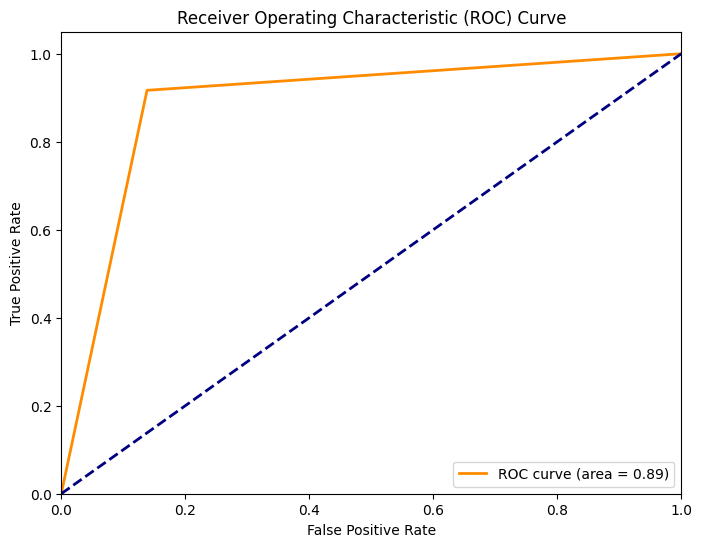

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate the AUC
roc_auc = roc_auc_score(Y_test, Y_PredNew)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_PredNew)

# Create a ROC curve plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import pandas as pd

# Concatenate the "ID" column from the original training data with the predicted "TARGET" values
result = pd.concat([Xtest['ID'], pd.DataFrame(Y_Pred, columns=['TARGET'])], axis=1)

# Save the result to a CSV file
result.to_csv('/gdrive/My Drive/Colab Notebooks/res5.csv', index=False)

# Read and display the CSV file
res = pd.read_csv('/gdrive/My Drive/Colab Notebooks/res5.csv')
res.tail()

,ID,TARGET
75813,151831,0
75814,151832,0
75815,151833,0
75816,151834,0
75817,151837,0


# **VERSION 6:**

**In this version, let us try to remove some features using correlation and fit the model.**

In [ ]:
#Defining trainData and testData for the second version of our model building:

trainData6 = trainData
testData6 = testData

In [ ]:
# Calculate the correlation matrix
correlation_matrix = trainData6.corr()

# Define a correlation threshold to identify highly correlated variables (you can adjust this threshold)
correlation_threshold = 0.8  # For example, consider variables with a correlation coefficient greater than 0.8 as highly correlated

# Create a set to keep track of variables to remove
variables_to_remove = set()

# Loop through the correlation matrix to identify highly correlated variables
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            variables_to_remove.add(colname)

# Convert the set of variables to remove to a list
variables_to_remove = list(variables_to_remove)

# Drop the highly correlated variables from the DataFrame
train_data_filtered = trainData.drop(variables_to_remove, axis=1)
test_data_filtered = testData.drop(variables_to_remove, axis=1)


# Now 'train_data_filtered' contains the dataset with highly correlated variables removed

In [ ]:
print(train_data_filtered.shape)
print(test_data_filtered.shape)

(76020, 168)
(75818, 167)


In [ ]:
#To get list of names of all Columns from a dataframe

TrainCols = list(train_data_filtered.columns.values)
TestCols = list(test_data_filtered.columns.values)
print(TrainCols)
print(TestCols)

['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1', 'imp_op_var40_comer_ult1', 'imp_op_var40_efect_ult1', 'imp_op_var40_ult1', 'imp_op_var41_efect_ult1', 'imp_sal_var16_ult1', 'ind_var1_0', 'ind_var1', 'ind_var2_0', 'ind_var2', 'ind_var5_0', 'ind_var5', 'ind_var6_0', 'ind_var6', 'ind_var12_0', 'ind_var13_0', 'ind_var13_largo_0', 'ind_var13_medio_0', 'ind_var14_0', 'ind_var14', 'ind_var17_0', 'ind_var18_0', 'ind_var19', 'ind_var20_0', 'ind_var25_cte', 'ind_var27_0', 'ind_var28_0', 'ind_var28', 'ind_var27', 'ind_var30_0', 'ind_var31_0', 'ind_var32_cte', 'ind_var33_0', 'ind_var34_0', 'ind_var37_cte', 'ind_var39_0', 'ind_var41', 'ind_var44_0', 'ind_var46_0', 'ind_var46', 'num_var4', 'num_var14_0', 'num_var17_0', 'num_op_var40_hace2', 'num_op_var40_hace3', 'num_op_var40_ult1', 'num_op_var41_hace2', 'num_op_var41_hace3', 'num_op_var41_ult1', 'num_var27_0', 'num_var28_0', 'num_var28', 'num_var27', 'num_var30_0', 'num_var37_med_ult2', 'num_var41', 'num_var46_0', 'num_var46

In [ ]:
# Seperate Target column from Train Data
Xtrain = train_data_filtered[TrainCols[0:len(TrainCols)-1]].copy()
Ytrain = train_data_filtered[['TARGET']].copy()
print(Xtrain.shape)
print(Ytrain.shape)
#Xtest = testData.drop(['TARGET'], axis=1)
Xtest = test_data_filtered
print(Xtest.shape)

(76020, 167)
(76020, 1)
(75818, 167)


In [ ]:
from imblearn.over_sampling import SMOTE

# For the features features Xtrain and label Ytrain
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(Xtrain, Ytrain)

In [ ]:
print(X_resampled.shape)
print(y_resampled.shape)

(146024, 167)
(146024, 1)


In [ ]:
# Initialising Decision Tree Algorithm and fitting the model on train set
#dt = DecisionTreeClassifier()
#dt = DecisionTreeClassifier(criterion = "entropy")
#dt = DecisionTreeClassifier(criterion = "entropy", max_depth = 20)
dt = DecisionTreeClassifier(criterion = "gini", max_depth = 15, max_leaf_nodes = 100, splitter="best", min_samples_split=2)
#dt = DecisionTreeClassifier(criterion = "entropy", max_depth = 30, max_leaf_nodes = 100, max_features = 9)

dt.fit(X_resampled, y_resampled)
Y_Pred = dt.predict(Xtest)
#print (Y_Pred)
Y_Pred = pd.DataFrame(Y_Pred,columns=['TARGET'])
#print (Y_Pred)
#Y_Pred.to_csv(index=False)
# Use this Y_Pred on Kaggle website to get accuracy result.

In [ ]:
# Basic Analysis
print("Count of values in TARGET column for Train Data")
print(y_resampled['TARGET'].value_counts())


Count of values in TARGET column for Train Data
0    73012
1    73012
Name: TARGET, dtype: int64


In [ ]:
# For us to check accuracy of our algorithm, we need to predict that data set for which we have TARGET available.
# Eg predict for Xtrain and check accuracy with TARGET that we have in order to judge our model.

Train_Pred = dt.predict(X_resampled)
#Model Accuracy
print(" TRAIN Accuracy:", metrics.accuracy_score(y_resampled,Train_Pred))

# This will always result in best score hence we are better off using TrainTestSplit, which can help us take care of

 TRAIN Accuracy: 0.9027214704432148


In [ ]:
# Split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, y_resampled, test_size = .50, random_state = 1)
# Fit model on new Train Dataset
dt = dt.fit(X_train, Y_train)
#Predict the responce on new Test Dataset
Y_PredNew = dt.predict(X_test)
#Model Accuracy
print("TEST Accuracy:", metrics.accuracy_score(Y_test,Y_PredNew))

TEST Accuracy: 0.899043992768312


In [ ]:
# Actual VS Predicted Matrix and TP,FP,TN,FN evaluation
print(metrics.confusion_matrix(Y_test, Y_PredNew))
print()
print('Printing the precision and recall, among other metrics')
print(metrics.classification_report(Y_test, Y_PredNew))

[[32790  3801]
 [ 3570 32851]]

Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     36591
           1       0.90      0.90      0.90     36421

    accuracy                           0.90     73012
   macro avg       0.90      0.90      0.90     73012
weighted avg       0.90      0.90      0.90     73012



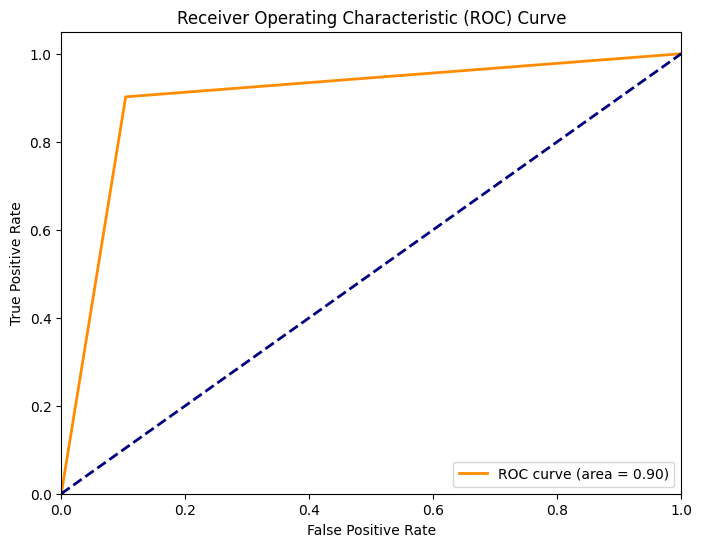

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate the AUC
roc_auc = roc_auc_score(Y_test, Y_PredNew)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_PredNew)

# Create a ROC curve plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import pandas as pd

# Concatenate the "ID" column from the original training data with the predicted "TARGET" values
result = pd.concat([Xtest['ID'], pd.DataFrame(Y_Pred, columns=['TARGET'])], axis=1)

# Save the result to a CSV file
result.to_csv('/gdrive/My Drive/Colab Notebooks/res6.csv', index=False)

# Read and display the CSV file
res = pd.read_csv('/gdrive/My Drive/Colab Notebooks/res6.csv')
res.tail()

,ID,TARGET
75813,151831,0
75814,151832,0
75815,151833,0
75816,151834,0
75817,151837,0


[Text(0.4134928385416667, 0.96875, 'x[15] <= 0.5\ngini = 0.5\nsamples = 73012\nvalue = [36421, 36591]'),
 Text(0.162109375, 0.90625, 'x[2] <= 25.5\ngini = 0.394\nsamples = 43568\nvalue = [11759, 31809]'),
 Text(0.052083333333333336, 0.84375, 'x[63] <= 0.001\ngini = 0.363\nsamples = 6039\nvalue = [4599, 1440]'),
 Text(0.041666666666666664, 0.78125, 'x[2] <= 23.5\ngini = 0.247\nsamples = 5373\nvalue = [4599, 774]'),
 Text(0.020833333333333332, 0.71875, 'x[150] <= 0.5\ngini = 0.152\nsamples = 3562\nvalue = [3266, 296]'),
 Text(0.010416666666666666, 0.65625, 'gini = 0.127\nsamples = 3173\nvalue = [2956, 217]'),
 Text(0.03125, 0.65625, 'gini = 0.324\nsamples = 389\nvalue = [310, 79]'),
 Text(0.0625, 0.71875, 'x[166] <= 61299.816\ngini = 0.389\nsamples = 1811\nvalue = [1333, 478]'),
 Text(0.052083333333333336, 0.65625, 'gini = 0.497\nsamples = 326\nvalue = [150, 176]'),
 Text(0.07291666666666667, 0.65625, 'x[150] <= 0.5\ngini = 0.324\nsamples = 1485\nvalue = [1183, 302]'),
 Text(0.0625, 0.59

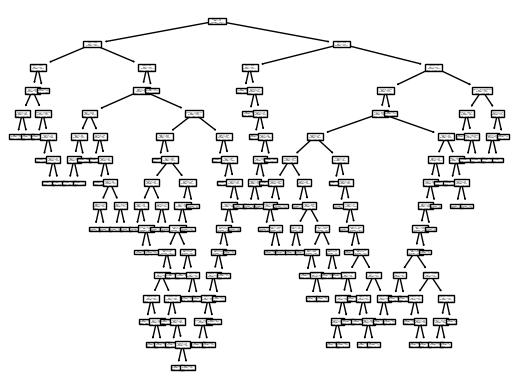

In [ ]:
#Plotting the decision Tree
tree.plot_tree(dt, max_depth = 15)